# 1) Imports

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
from utils import nomes, decode_rle


# 2) Carregar dataset

In [13]:
dataset = pd.read_feather('train_com_imagens.feather')
dataset = dataset.sample(frac=1)
dataset

,id,class,segmentation,image,width,height
51599,case133_day25_slice_0055,small_bowel,None,.\train\case133\case133_day25\scans\slice_0055...,360,310
69219,case119_day20_slice_0003,small_bowel,None,.\train\case119\case119_day20\scans\slice_0003...,266,266
13359,case135_day0_slice_0005,large_bowel,None,.\train\case135\case135_day0\scans\slice_0005_...,266,266
49954,case54_day35_slice_0095,large_bowel,22451 10 22716 14 22981 17 23246 21 23511 24 2...,.\train\case54\case54_day35\scans\slice_0095_2...,266,266
56971,case141_day0_slice_0083,small_bowel,23268 8 23525 19 23560 13 23774 36 23823 19 24...,.\train\case141\case141_day0\scans\slice_0083_...,266,266
...,...,...,...,...,...,...
55665,case24_day25_slice_0120,stomach,None,.\train\case24\case24_day25\scans\slice_0120_2...,266,266
835,case44_day0_slice_0001,stomach,None,.\train\case44\case44_day0\scans\slice_0001_26...,266,266
76602,case134_day21_slice_0021,large_bowel,None,.\train\case134\case134_day21\scans\slice_0021...,360,310
65634,case65_day28_slice_0037,small_bowel,None,.\train\case65\case65_day28\scans\slice_0037_2...,266,266


## Código para converter máscara RLE para matriz de pixels

In [15]:
dataset['decoded_segmentation'] = dataset.apply(
	lambda x:
		None if x['segmentation'] is None
		else decode_rle(
			x['segmentation'],
			shape=(x['height'], x['width'])
		),
	axis=1
)
# dataset['decoded_segmentation_2'] = dataset['decoded_segmentation'].vflatten()
dataset

,id,class,segmentation,image,width,height,decoded_segmentation
51599,case133_day25_slice_0055,small_bowel,None,.\train\case133\case133_day25\scans\slice_0055...,360,310,None
69219,case119_day20_slice_0003,small_bowel,None,.\train\case119\case119_day20\scans\slice_0003...,266,266,None
13359,case135_day0_slice_0005,large_bowel,None,.\train\case135\case135_day0\scans\slice_0005_...,266,266,None
49954,case54_day35_slice_0095,large_bowel,22451 10 22716 14 22981 17 23246 21 23511 24 2...,.\train\case54\case54_day35\scans\slice_0095_2...,266,266,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
56971,case141_day0_slice_0083,small_bowel,23268 8 23525 19 23560 13 23774 36 23823 19 24...,.\train\case141\case141_day0\scans\slice_0083_...,266,266,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
...,...,...,...,...,...,...,...
55665,case24_day25_slice_0120,stomach,None,.\train\case24\case24_day25\scans\slice_0120_2...,266,266,None
835,case44_day0_slice_0001,stomach,None,.\train\case44\case44_day0\scans\slice_0001_26...,266,266,None
76602,case134_day21_slice_0021,large_bowel,None,.\train\case134\case134_day21\scans\slice_0021...,360,310,None
65634,case65_day28_slice_0037,small_bowel,None,.\train\case65\case65_day28\scans\slice_0037_2...,266,266,None


(266, 266) 266 266
.\train\case119\case119_day21\scans\slice_0050_266_266_1.50_1.50.png


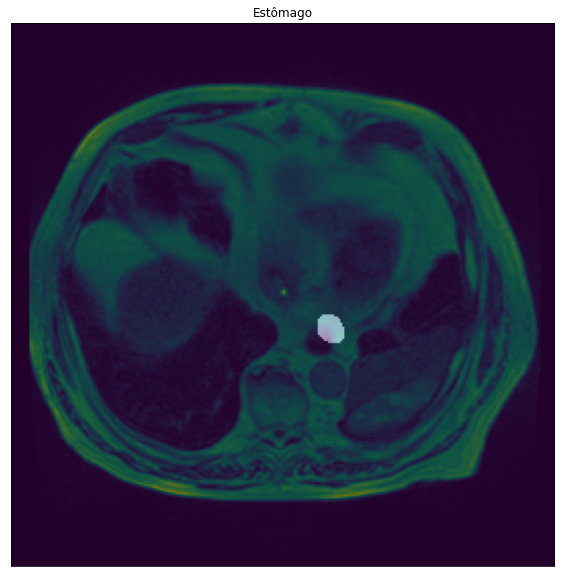

In [53]:
linha = dataset[dataset['segmentation'].notnull()].sample(1).iloc[0]
decoded_segmentation = linha['decoded_segmentation']

print(decoded_segmentation.shape, linha['width'], linha['height'])

# Ajustar se matriz tiver invertido largura com altura
if (
	decoded_segmentation.shape[0] != linha['height'] and
	decoded_segmentation.shape[1] != linha['width']
):
	decoded_segmentation = decoded_segmentation.reshape(linha['width'], linha['height'])
	print('>', decoded_segmentation.shape, linha['width'], linha['height'])

# Desenhar
fig = plt.figure(figsize=(10, 10))
fig.patch.set_alpha(1)

plt.imshow(plt.imread(linha['image']))
plt.imshow(decoded_segmentation, alpha=0.5, cmap='gray')

print(linha['image'])
plt.title(nomes[linha['class']])
plt.xticks([])
plt.yticks([])
plt.show()